In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D2-Conrad/S1/Office_Conrad-S1.csv",index_col='timestamp')

In [4]:
df.head(5),df.tail(5)

(                 Office_Conrad
 timestamp                     
 01-01-2015 0:00          7.025
 01-01-2015 1:00          6.975
 01-01-2015 2:00          7.000
 01-01-2015 3:00          7.500
 01-01-2015 4:00          6.275,                   Office_Conrad
 timestamp                      
 31-03-2015 20:00          7.675
 31-03-2015 21:00          8.250
 31-03-2015 22:00          8.500
 31-03-2015 23:00          7.225
 01-04-2015 0:00           9.050)

In [5]:
train_data = df.iloc[:1440]
test_data = df.iloc[1440:]

In [6]:
len(train_data),len(test_data)

(1440, 720)

In [7]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [8]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [9]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [10]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [11]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [12]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (1416, 24, 1)
y_train.shape =  (1416,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [13]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [14]:
# define model
model = Sequential()
model.add(LSTM(24, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(24, activation='tanh'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 24)            2496      
                                                                 
 lstm_1 (LSTM)               (None, 24)                4704      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 7,225
Trainable params: 7,225
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
12/12 [==============================] - 3s 19ms/step - loss: 127.1988
Epoch 2/300
12/12 [==============================] - 0s 18ms/step - loss: 108.3162
Epoch 3/300
12/12 [==============================] - 0s 19ms/step - loss: 92.5065
Epoch 4/300
12/12 [==============================] - 0s 19ms/step - loss: 77.1152
Epoch 5/300
12/12 [==============================] - 0s 19ms/step - loss: 62.7822
Epoch 6/300
12/12 [==============================] - 0s 19ms/step - loss: 50.5448
Epoch 7/300
12/12 [==============================] - 0s 18ms/step - loss: 40.2866
Epoch 8/300
12/12 [==============================] - 0s 20ms/step - loss: 32.3815
Epoch 9/300
12/12 [==============================] - 0s 18ms/step - loss: 26.6799
Epoch 10/300
12/12 [==============================] - 0s 18ms/step - loss: 22.6988
Epoch 11/300
12/12 [==============================] - 0s 20ms/step - loss: 19.8197
Epoch 12/300
12/12 [==============================] - 0s 18ms/step - loss: 17.6254
Epoch 13/30

In [16]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [18]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [19]:
print('Root Mean Squared Error for Stacked LSTM Model for training is:',rmse_train)
print('Root Mean Squared Error for Stacked LSTM Model for testing is:',rmse_test)
print('Mean Absolute Error for Stacked LSTM Model for training is:',mae_train)
print('Mean Absolute Error for Stacked LSTM Model for testing is:',mae_test)
print('MAPE for Stacked Model for training is:',mape_train)
print('MAPE for Stacked Model for testing is:',mape_test)

Root Mean Squared Error for Stacked LSTM Model for training is: 1.1549454381954192
Root Mean Squared Error for Stacked LSTM Model for testing is: 1.258637411631871
Mean Absolute Error for Stacked LSTM Model for training is: 0.8919914400025101
Mean Absolute Error for Stacked LSTM Model for testing is: 0.9898187307192001
MAPE for Stacked Model for training is: 0.08208680011522715
MAPE for Stacked Model for testing is: 0.09581276260638215


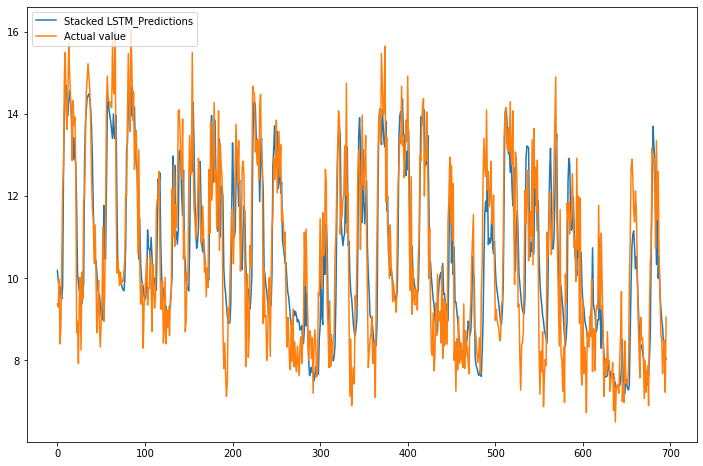

In [20]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='Stacked LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [21]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([9.375]), array([10.191112], dtype=float32))

In [22]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([-0.81611156]), array([-0.63014698]), array([0.17904091]), array([-1.40682411]), array([-0.75060082]), array([0.98232365]), array([2.37488747]), array([0.07454872]), array([0.8852005]), array([0.90765476]), array([-0.65360332]), array([-0.68285805]), array([0.62021828]), array([1.40337849]), array([0.40883255]), array([0.09865189]), array([-0.10681057]), array([-0.70314468]), array([1.43504238]), array([0.30552959]), array([1.01220894]), array([-0.11922455]), array([-3.02348518]), array([-1.16388321]), array([-1.97687149]), array([-0.2152586]), array([0.39533901]), array([-1.35738754]), array([0.77578259]), array([-0.10929394]), array([2.00635052]), array([-0.82831097]), array([-0.59145928]), array([0.4764967]), array([0.44357586]), array([0.78087139]), array([0.43389702]), array([0.22621822]), array([-0.27149487]), array([-1.24501228]), array([-1.19355965]), array([-0.26463509]), array([-0.53319073]), array([0.94573402]), array([-0.20201778]), array([-1.47102261]), array([-0.59

In [23]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([3.45435715]), array([-3.24908161]))

In [24]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [25]:
len(neg),len(pos)

(344, 352)